In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [4]:
tax_inc =[]
for i in df['Taxable.Income']:
    if i<=30000:
        tax_inc.append('Risky')
    else:
        tax_inc.append('Good')
df['tax_inc'] = tax_inc
        

In [5]:
df.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban', 'tax_inc'],
      dtype='object')

In [6]:
df.drop('Taxable.Income', axis=1, inplace=True)
df.columns

Index(['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience',
       'Urban', 'tax_inc'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   City.Population  600 non-null    int64 
 3   Work.Experience  600 non-null    int64 
 4   Urban            600 non-null    object
 5   tax_inc          600 non-null    object
dtypes: int64(2), object(4)
memory usage: 28.2+ KB


In [8]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [9]:
df.isna().sum()

Undergrad          0
Marital.Status     0
City.Population    0
Work.Experience    0
Urban              0
tax_inc            0
dtype: int64

In [10]:
df[df.duplicated()]

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc


In [11]:
print(df['Undergrad'].value_counts())
print(df['Marital.Status'].value_counts())
print(df['Urban'].value_counts())
print(df['tax_inc'].value_counts())

YES    312
NO     288
Name: Undergrad, dtype: int64
Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64
YES    302
NO     298
Name: Urban, dtype: int64
Good     476
Risky    124
Name: tax_inc, dtype: int64


In [12]:
print(df['Undergrad'].unique())
print(df['Marital.Status'].unique())
print(df['Urban'].unique())
print(df['tax_inc'].unique())

['NO' 'YES']
['Single' 'Divorced' 'Married']
['YES' 'NO']
['Good' 'Risky']


In [14]:
Le = preprocessing.LabelEncoder()
df['Undergrad'] = Le.fit_transform(df['Undergrad'])
df['Marital.Status'] = Le.fit_transform(df['Marital.Status'])
df['Urban'] = Le.fit_transform(df['Urban'])
df['tax_inc'] = Le.fit_transform(df['tax_inc'])

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Undergrad        600 non-null    int64
 1   Marital.Status   600 non-null    int64
 2   City.Population  600 non-null    int64
 3   Work.Experience  600 non-null    int64
 4   Urban            600 non-null    int32
 5   tax_inc          600 non-null    int32
dtypes: int32(2), int64(4)
memory usage: 23.6 KB


In [16]:
df.corr()

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban,tax_inc
Undergrad,1.000000,0.042407,0.079579,-0.005362,-0.000267,0.012523
Marital.Status,0.042407,1.000000,-0.001564,-0.002213,0.064562,0.006081
City.Population,0.079579,-0.001564,1.000000,0.013135,-0.040098,0.012225
Work.Experience,-0.005362,-0.002213,0.013135,1.000000,-0.094559,-0.001972
Urban,-0.000267,0.064562,-0.040098,-0.094559,1.000000,0.004830
tax_inc,0.012523,0.006081,0.012225,-0.001972,0.004830,1.000000


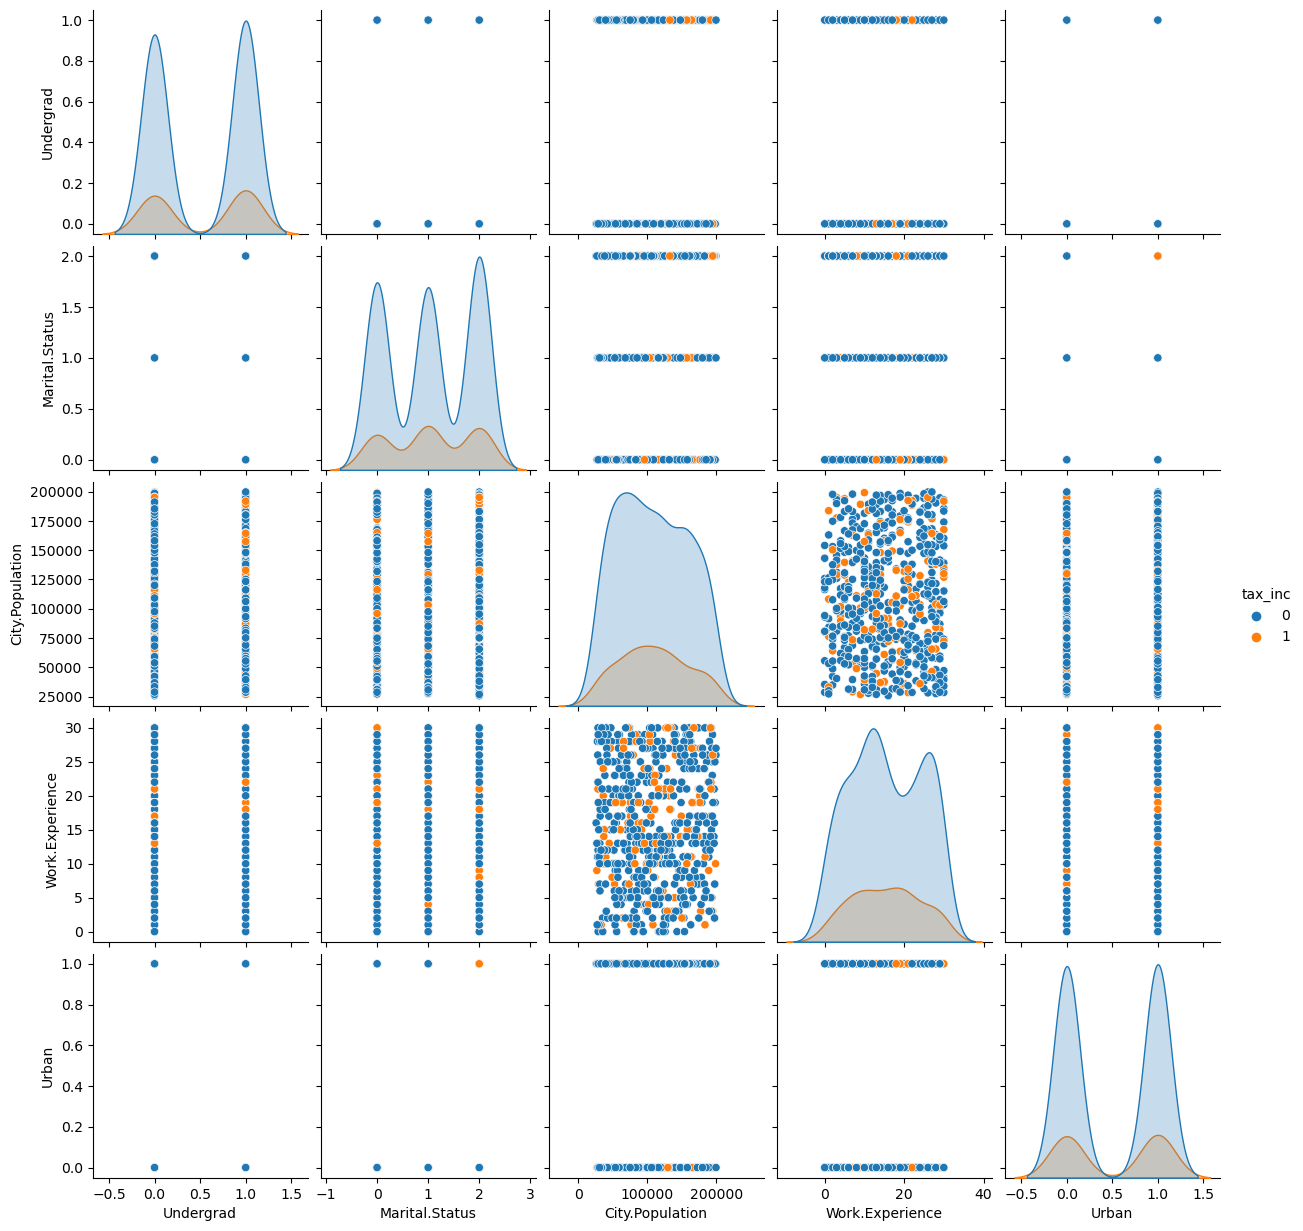

In [18]:
sns.pairplot(df, hue = 'tax_inc')
plt.show()

In [19]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]
print(x)
print(y)

     Undergrad  Marital.Status  City.Population  Work.Experience  Urban
0            0               2            50047               10      1
1            1               0           134075               18      1
2            0               1           160205               30      1
3            1               2           193264               15      1
4            0               1            27533               28      0
..         ...             ...              ...              ...    ...
595          1               0            39492                7      1
596          1               0            55369                2      1
597          0               0           154058                0      1
598          1               1           180083               17      0
599          0               0           158137               16      0

[600 rows x 5 columns]
0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: tax_inc

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=40)

# Building Decision Tree Classifier using Entropy Criteria

In [21]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=3)
model.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [22]:
model

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
tree.plot_tree(model);

In [27]:
ytrain.value_counts().keys()

Int64Index([0, 1], dtype='int64')

In [28]:
df['tax_inc'].value_counts()

0    476
1    124
Name: tax_inc, dtype: int64

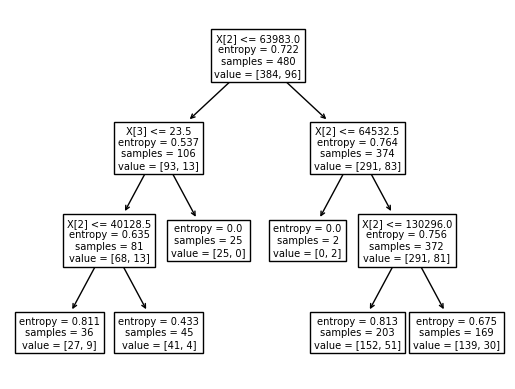

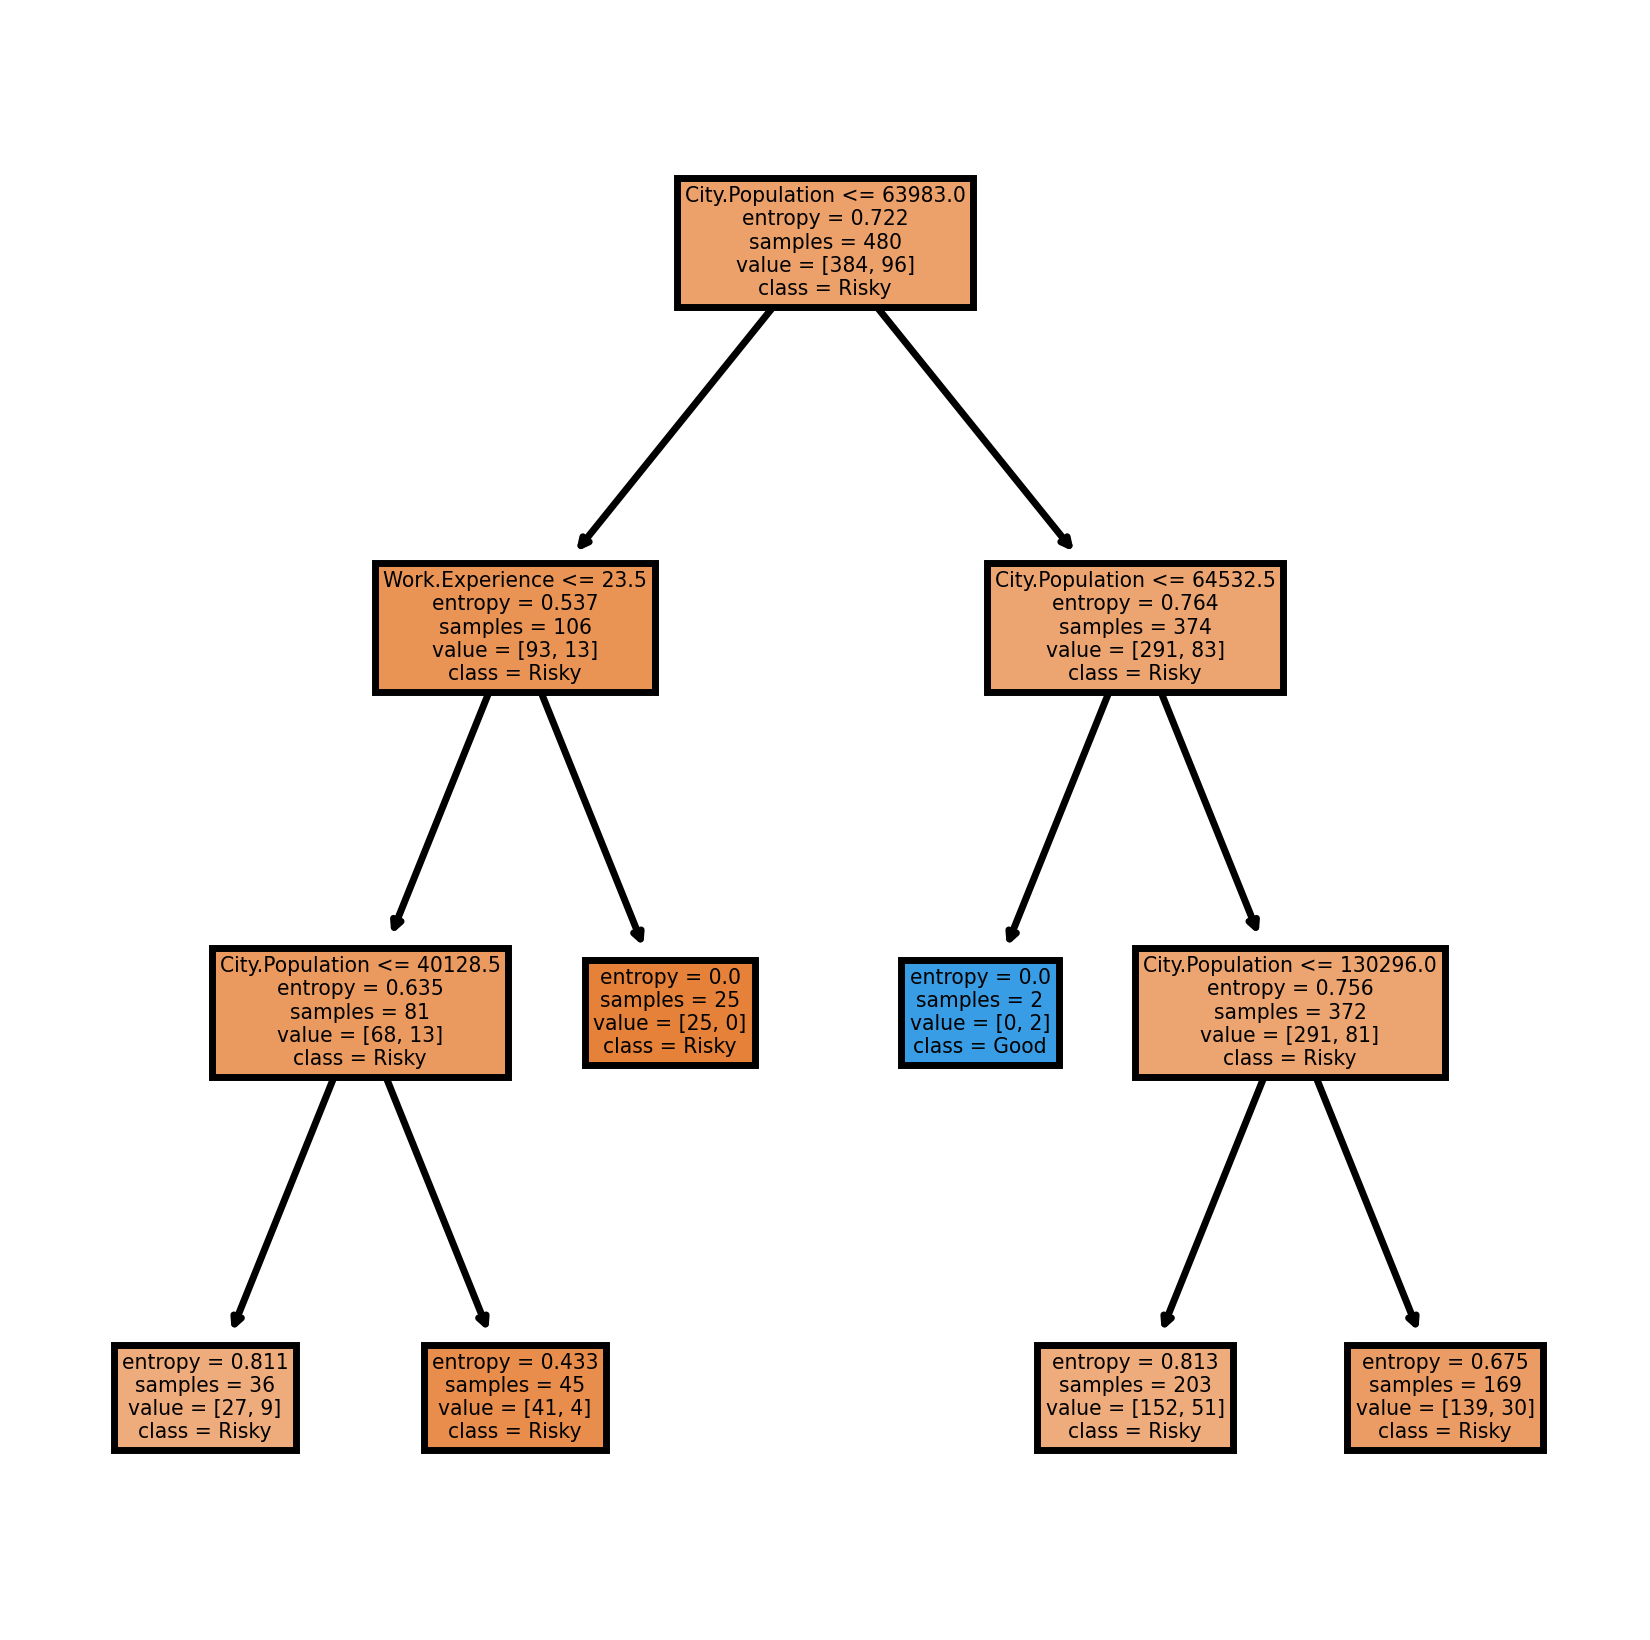

In [29]:
col = ['Undergrad', 'Marital.Status', 'City.Population', 'Work.Experience','Urban']
cn = ['Risky', 'Good']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 500)
tree.plot_tree(model, feature_names = col, class_names = cn, filled = True)
plt.show()

In [30]:
pred = model.predict(xtest)
pd.Series(pred).value_counts()

0    120
dtype: int64

In [31]:
ytest.value_counts()

0    92
1    28
Name: tax_inc, dtype: int64

In [32]:
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
model.feature_importances_

array([0.        , 0.        , 0.71003667, 0.28996333, 0.        ])

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
accuracy_score(ytest,pred)

0.7666666666666667

# Building Decision Tree Classifier (CART) using Gini Criteria

In [36]:
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [37]:
model_gini.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=3)

In [38]:
accuracy_score(ytest,pred)

0.7666666666666667